In [ ]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from jiwer import wer, cer
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:


df = pd.read_csv('/content/whisper_text.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Convert text and translated_text to lowercase
df['text'] = df['text'].str.lower()
df['translated_text'] = df['translated_text'].str.lower()

# Tokenization, stop word removal, and stemming
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)
df['translated_text'] = df['translated_text'].apply(preprocess_text)

# Display the preprocessed DataFrame

In [ ]:
df.head()

,audio_file,text,full_audio_path,translated_text
0,1272-128104-0000,mister quilter apostl middl class glad welcom ...,/content/audios/1272-128104-0000.flac,quilter apostl middl class glad welcom gospel
1,1272-128104-0001,mister quilter manner less interest matter,/content/audios/1272-128104-0001.flac,quilter manner less interest matter
2,1272-128104-0002,tell us festiv season year christma roast beef...,/content/audios/1272-128104-0002.flac,tell us festiv season year christma roast beef...
3,1272-128104-0003,grave doubt whether sir frederick leighton wor...,/content/audios/1272-128104-0003.flac,grave doubt whether sir frederick layton work ...
4,1272-128104-0004,linnel pictur sort guard em paint mason exquis...,/content/audios/1272-128104-0004.flac,lynel pictur sort upgard atom paint mason exqu...


In [ ]:
# Tokenize text and translated_text columns
df['text_tokens'] = df['text'].apply(word_tokenize)
df['translated_tokens'] = df['translated_text'].apply(word_tokenize)

# Remove words from 'text' column that are not present in 'translated_text' column
df['text'] = df.apply(lambda row: ' '.join([word for word in row['text_tokens'] if word in row['translated_tokens']]), axis=1)

# Drop intermediate token columns
df = df.drop(['text_tokens', 'translated_tokens'], axis=1)



In [ ]:
df.head()

,audio_file,text,full_audio_path,translated_text
0,1272-128104-0000,quilter apostl middl class glad welcom gospel,/content/audios/1272-128104-0000.flac,quilter apostl middl class glad welcom gospel
1,1272-128104-0001,quilter manner less interest matter,/content/audios/1272-128104-0001.flac,quilter manner less interest matter
2,1272-128104-0002,tell us festiv season year christma roast beef...,/content/audios/1272-128104-0002.flac,tell us festiv season year christma roast beef...
3,1272-128104-0003,grave doubt whether sir frederick work realli ...,/content/audios/1272-128104-0003.flac,grave doubt whether sir frederick layton work ...
4,1272-128104-0004,pictur sort paint mason exquisit nation jingo ...,/content/audios/1272-128104-0004.flac,lynel pictur sort upgard atom paint mason exqu...


In [ ]:
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
import Levenshtein
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame

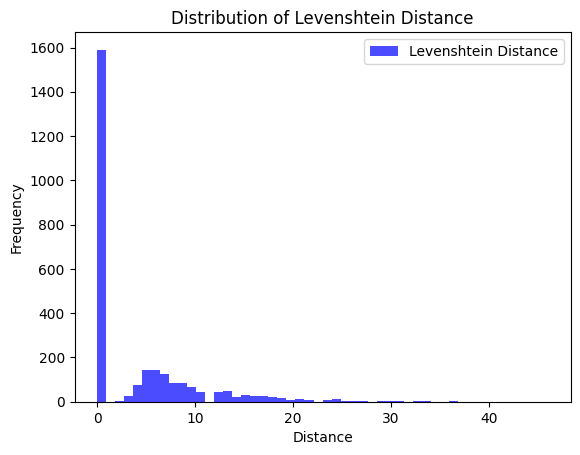

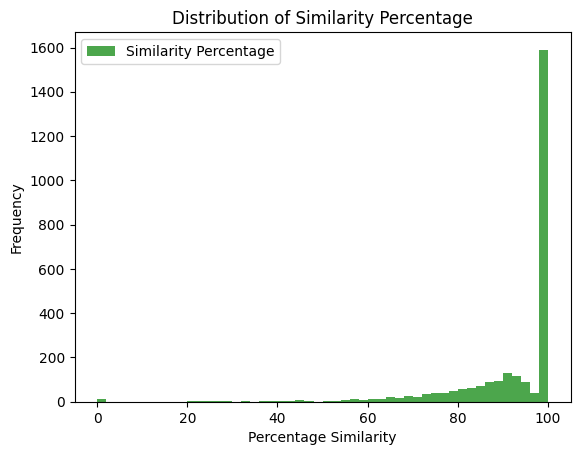

In [ ]:
# Calculate Levenshtein distance
df['levenshtein_distance'] = df.apply(lambda row: Levenshtein.distance(row['text'], row['translated_text']), axis=1)

# Calculate percentage similarity (inverse of Levenshtein distance)
df['similarity_percentage'] = 100 * (1 - df['levenshtein_distance'] / df[['text', 'translated_text']].apply(lambda x: max(len(x['text']), len(x['translated_text'])), axis=1))

# Visualize the distribution of Levenshtein distances
plt.hist(df['levenshtein_distance'], bins=50, alpha=0.7, color='b', label='Levenshtein Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Levenshtein Distance')
plt.show()

# Visualize the distribution of similarity percentages
plt.hist(df['similarity_percentage'], bins=50, alpha=0.7, color='g', label='Similarity Percentage')
plt.xlabel('Percentage Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Similarity Percentage')
plt.show()


In [ ]:

# Calculate and print the average similarity percentage
average_similarity_percentage = df['similarity_percentage'].mean()
print(f'Average Similarity Percentage: {average_similarity_percentage:.2f}%')

Average Similarity Percentage: 92.11%


Average Jaccard Similarity: 0.9939


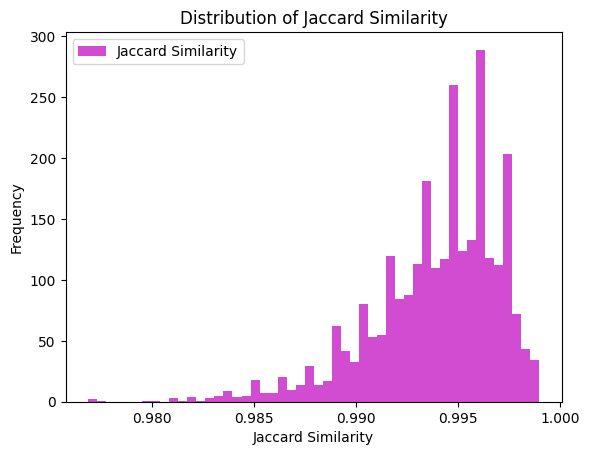

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt

# Vectorize the text and translated_text columns using CountVectorizer
vectorizer = CountVectorizer().fit_transform(df['text'] + ' ' + df['translated_text'])
vectors = vectorizer.toarray()

# Calculate Jaccard similarity
jaccard_similarities = [jaccard_score(vectors[i], vectors[i + 1], average='micro') for i in range(len(vectors) - 1)]

# Calculate average Jaccard similarity
average_jaccard_similarity = sum(jaccard_similarities) / len(jaccard_similarities) if jaccard_similarities else 0

# Print the average Jaccard similarity
print(f'Average Jaccard Similarity: {average_jaccard_similarity:.4f}')

# Visualize the distribution of Jaccard similarities
plt.hist(jaccard_similarities, bins=50, alpha=0.7, color='m', label='Jaccard Similarity')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Jaccard Similarity')
plt.show()

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=c58e68b9e4a029e7a216f5cf8470aedbf7961786012dbbf2ab9edd50e5723da6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


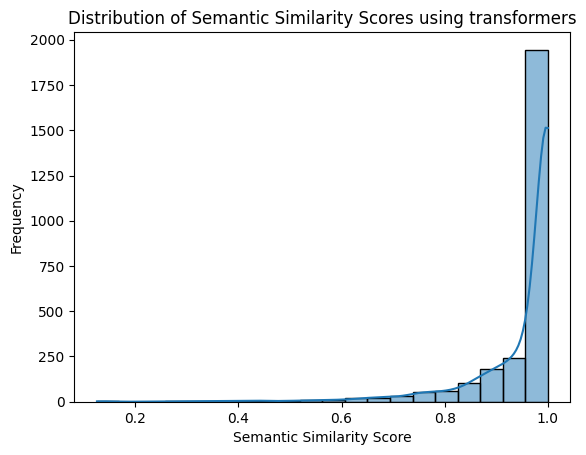

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


# Load a pre-trained transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate semantic similarity using transformers
def calculate_semantic_similarity(row):
    embeddings = model.encode([row['text'], row['translated_text']])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

# Add a new column for semantic similarity scores
df['semantic_similarity'] = df.apply(calculate_semantic_similarity, axis=1)

# Plotting
sns.histplot(df['semantic_similarity'], bins=20, kde=True)
plt.xlabel('Semantic Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Semantic Similarity Scores using transformers')
plt.show()


In [ ]:
(df['semantic_similarity'].sum())/(len(df))

0.9512689712530059